In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd


In [42]:
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

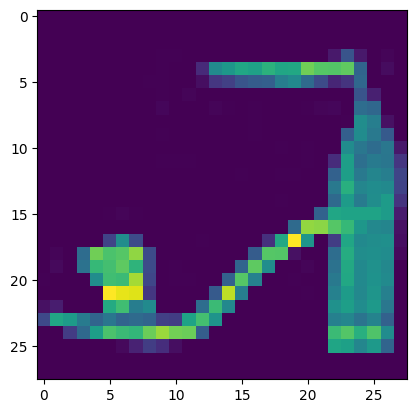

In [43]:
plt.imshow(X_train[1])

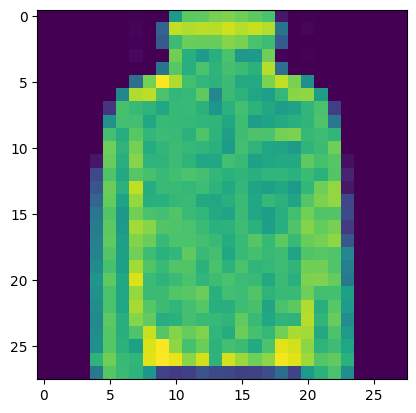

In [44]:
plt.imshow(X_train[0])

In [45]:
classes  = np.unique(y_train)
nclasses = len(classes)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [46]:
x_train =  x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train/255.0

x_test =  x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test/255.0

In [47]:
from tensorflow.keras.utils import to_categorical
one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, one_hot_y_train, test_size = 0.2, random_state=14)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D, BatchNormalization, LeakyReLU

In [63]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(28,28,1),padding='same')),
model.add(LeakyReLU(alpha=0.1)),
model.add(MaxPooling2D((2,2), padding="same")),
model.add(Dropout(0.25)),

model.add(Conv2D(64, (3,3), activation = 'linear',padding='same')),
model.add(LeakyReLU(alpha=0.1)),
model.add(MaxPooling2D((2,2), padding="same")),
model.add(Dropout(0.25)),

model.add(Conv2D(128, (3,3), activation = 'linear',padding='same')),
model.add(LeakyReLU(alpha=0.1)),
model.add(MaxPooling2D((2,2),padding='same')),

model.add(Flatten()),
model.add(Dense(128, activation = 'linear')),
model.add(Dropout(0.25)),
model.add(Dense(10, activation = 'softmax'))


In [66]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [ ]:
from re import VERBOSE
result = model.fit(
    X_train, y_train,
    batch_size= 64,
    epochs=20,
    verbose = 1,
    validation_data = (X_test,y_test)
)

Epoch 1/20
750/750 [==============================] - 113s 146ms/step - loss: 0.5278 - accuracy: 0.8077 - val_loss: 0.3753 - val_accuracy: 0.8598
Epoch 2/20
750/750 [==============================] - 124s 166ms/step - loss: 0.3427 - accuracy: 0.8741 - val_loss: 0.2920 - val_accuracy: 0.8899
Epoch 3/20
750/750 [==============================] - 102s 136ms/step - loss: 0.2954 - accuracy: 0.8919 - val_loss: 0.2599 - val_accuracy: 0.9051
Epoch 4/20
750/750 [==============================] - 102s 136ms/step - loss: 0.2720 - accuracy: 0.9013 - val_loss: 0.2562 - val_accuracy: 0.9070
Epoch 5/20
750/750 [==============================] - 103s 137ms/step - loss: 0.2560 - accuracy: 0.9070 - val_loss: 0.2438 - val_accuracy: 0.9130
Epoch 6/20
750/750 [==============================] - 107s 143ms/step - loss: 0.2418 - accuracy: 0.9107 - val_loss: 0.2267 - val_accuracy: 0.9156
Epoch 7/20
750/750 [==============================] - 106s 141ms/step - loss: 0.2279 - accuracy: 0.9166 - val_loss: 0.2312 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test Accuracy: ", test_acc)